<a href="https://colab.research.google.com/github/JHKim-snu/AI_Expert/blob/main/Lab2_1_Logic_Gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logic Gate Example


In [6]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Separator(nn.Module):
  def __init__(self,func=None):
    super(Separator, self).__init__()
    self.a = torch.nn.Parameter(torch.Tensor([np.random.normal()]))
    self.b = torch.nn.Parameter(torch.Tensor([np.random.normal()]))
    self.c = torch.nn.Parameter(torch.Tensor([np.random.normal()]))
    if func is not None:
      self.func = func
    else:
      self.func = torch.sigmoid
  
  def forward(self, x):
    val_ = self.func(self.a * x[:,0] + self.b * x[:,1] - self.c).unsqueeze(-1)
    return val_

In [8]:
class DataGenerator(Dataset):
  def __init__(self, type_, length, std=0.08):
    self.length = length
    if type_ == 'and':
      self.val_l = [0, 0, 0, 1]
    elif type_ == 'or':
      self.val_l = [0, 1, 1, 1]
    elif type_ == 'xor':
      self.val_l = [0, 1, 1, 0]
    else:
      self.val_l = [0, 0, 0, 0]
     
    self.dataset = []
    for i in range(length):
      x = np.random.normal(i%2, std)      #0,1,0,1,0,1,0,1,...
      y = np.random.normal((i//2)%2, std) #0,0,1,1,0,0,1,1,...
      val = self.val_l[i%4]
      self.dataset.append((x, y, val))
      
  def get_dataset(self):
    return self.dataset
    
  def __len__(self):
    return self.length
    
  def __getitem__(self, idx):
    x, y, val = self.dataset[idx]
    return (torch.Tensor([x, y]), torch.Tensor([val]))

In [9]:
DATASET = DataGenerator('and', 1000)
lr = 0.01 # learning rate
batch_size = 20
num_epochs = 30
num_workers = 4

params = {
    'batch_size' : batch_size,
    'shuffle' : True,
    'num_workers' : num_workers
}

dataloader = DataLoader(DATASET, **params)
model = Separator().cuda()
optimizer = Adam(model.parameters(), lr=lr)


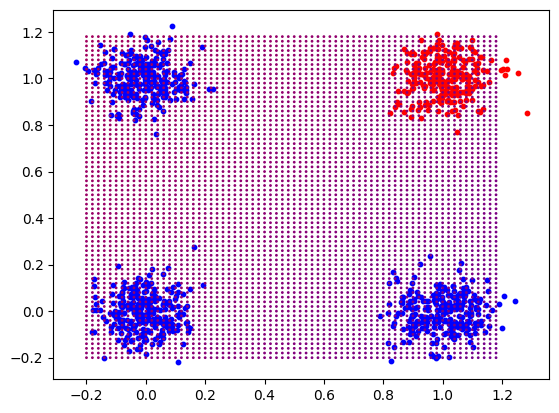

Loss : 0.25632
Loss : 0.20969
Loss : 0.17552
Loss : 0.14938
Loss : 0.12951


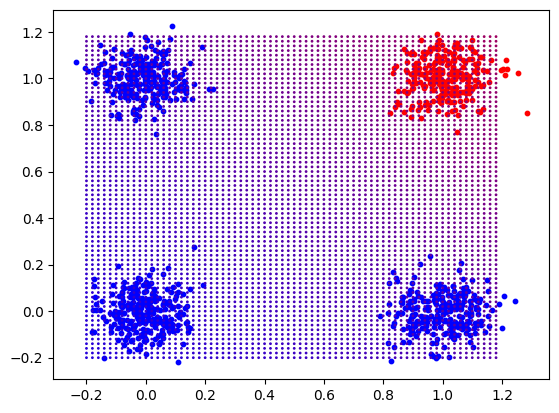

Loss : 0.11383
Loss : 0.10156
Loss : 0.09140
Loss : 0.08264
Loss : 0.07560


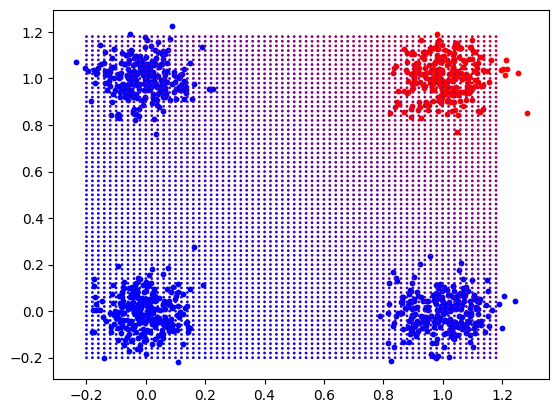

Loss : 0.06930
Loss : 0.06372
Loss : 0.05889
Loss : 0.05458
Loss : 0.05075


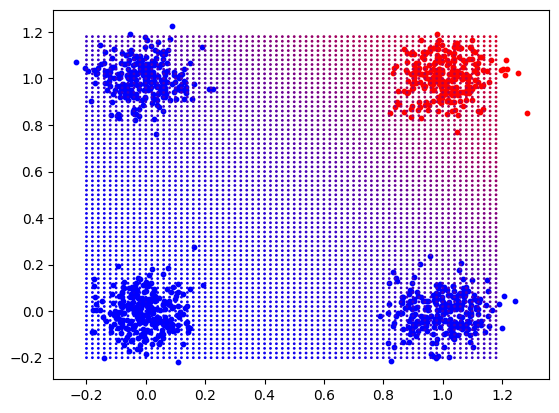

Loss : 0.04727
Loss : 0.04414
Loss : 0.04134
Loss : 0.03868
Loss : 0.03638


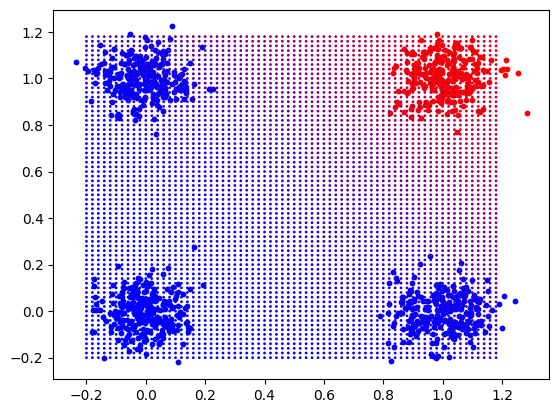

Loss : 0.03423
Loss : 0.03225
Loss : 0.03043
Loss : 0.02877
Loss : 0.02723


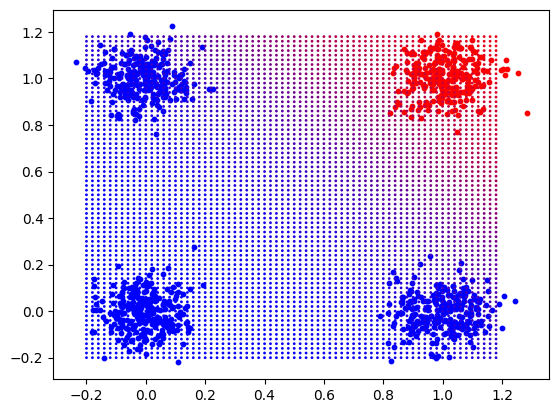

Loss : 0.02581
Loss : 0.02447
Loss : 0.02328
Loss : 0.02212
Loss : 0.02108


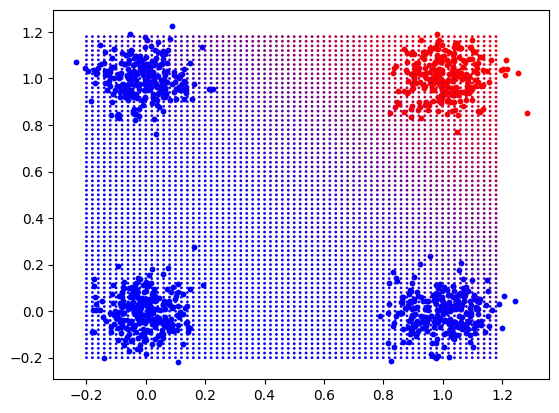

In [10]:
def show(model):
  for item in DATASET.get_dataset():
    x, y, val = item
    if val == 1:
      plt.scatter(x, y, c='red', s=10)
    else:
      plt.scatter(x, y, c='blue', s=10)
  t = torch.arange(70,dtype=torch.float32)*0.02-0.2
  x = t.unsqueeze(0).repeat(70,1).unsqueeze(-1)
  y = t.unsqueeze(1).repeat(1,70).unsqueeze(-1)
  data = torch.cat((x,y),-1).view(-1,2)
  with torch.no_grad():
    val = (model(data.cuda())).cpu()
  colors = torch.cat((val,torch.zeros_like(val),1-val),-1).numpy()
  plt.scatter(data.numpy()[:,0],data.numpy()[:,1], c=colors, s=1)
  plt.show()

show(model)


for epoch in range(num_epochs):
  total_loss = 0
  for x, val in dataloader: 
    x = x.cuda()
    val = val.cuda()
    optimizer.zero_grad()
    val_ =  model(x)

    loss = torch.sum(torch.pow(val - val_, 2))

    loss.backward()
    # for i, n in model.named_parameters():
    #   # print(i)
    #   if i == 'b':
    #     new_grad = torch.tensor([1.1])
    #     new_grad = new_grad.cuda()
    #     n.grad = new_grad
      
      #print(n.grad)

    optimizer.step()
    total_loss += loss.item()
  print("Loss : {:.5f}".format(total_loss / len(DATASET)))
  if epoch % 5  == 4:
    model.eval()
    show(model)
    model.train()